# Assignment 1: Using ggplot2 for visualization
# Frances Zi Yang

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt
from unicodedata import normalize

In [2]:
import warnings
warnings.filterwarnings("ignore")

<div class="alert-warning">
I changed the color of markdown cell to light yellow for my comments & thoughts.
</div>

In [3]:
df1 = pd.read_csv("/Users/FrancesY/Documents/Columbia/spring2022/5063viz/hw11/assignment-1---winter-olympics-franyang6/data/athletes_and_events.csv")
df2 = pd.read_csv("/Users/FrancesY/Documents/Columbia/spring2022/5063viz/hw11/assignment-1---winter-olympics-franyang6/data/gdp_pop.csv")
df3 = pd.read_csv("/Users/FrancesY/Documents/Columbia/spring2022/5063viz/hw11/assignment-1---winter-olympics-franyang6/data/noc_regions.csv")

In [4]:
df1.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
df2 = df2.rename(columns={"Code": "NOC"})

In [6]:
df2.head()

Country  NOC  Population  GDP per Capita
0      Afghanistan  AFG  32526562.0      594.323081
1          Albania  ALB   2889167.0     3945.217582
2          Algeria  ALG  39666519.0     4206.031232
3  American Samoa*  ASA     55538.0             NaN
4          Andorra  AND     70473.0             NaN

In [7]:
df3.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

<div class="alert-warning">
1)a) I've decided to merge the three dataframes based on their NOC codes and drop the rows without corresponding NOC codes, due to historical differences on country & NOC names. 
After that, I filtered "Medal" to not null, "Season" == "Winter", then dropping rows with duplicated medals in the same event.
Then I grouped the dataframe by "NOC" and sorted value descendingly, the top 10 (NOC_top10) are countries with the most total medals in winter olympics. 
</div>

In [8]:
df4 = pd.merge(df1, df2, on="NOC")
df5 = pd.merge(df4,df3, on="NOC")

In [9]:
df5 = df5[~df5['Medal'].isnull()]

In [10]:
df5 = df5[df5["Season"] == "Winter"]

In [11]:
df5 = df5.drop_duplicates(
  subset = ['Country','Year', 'Event','Medal'],
  keep = 'last').reset_index(drop = True)

In [12]:
df5.head()

ID        Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   3610   An Yulong   M  19.0   173.0    70.0  China  CHN  1998 Winter  1998   
1  20240     Chen Lu   F  17.0   162.0    52.0  China  CHN  1994 Winter  1994   
2  20240     Chen Lu   F  21.0   162.0    52.0  China  CHN  1998 Winter  1998   
3  33949   Fan Kexin   F  20.0   170.0    55.0  China  CHN  2014 Winter  2014   
4  43983  Guo Xinxin   F  26.0   157.0    60.0  China  CHN  2010 Winter  2010   

   Season         City                      Sport  \
0  Winter       Nagano  Short Track Speed Skating   
1  Winter  Lillehammer             Figure Skating   
2  Winter       Nagano             Figure Skating   
3  Winter        Sochi  Short Track Speed Skating   
4  Winter    Vancouver           Freestyle Skiing   

                                            Event   Medal Country  \
0      Short Track Speed Skating Men's 500 metres  Silver   China   
1                  Figure Skating Women's Singles  Bronze   China   
2                  Figure Skating Women's Singles  Bronze   China   
3  Short Track Speed Skating Women's 1,000 metres  Silver   China   
4                Freestyle Skiing Women's Aerials  Bronze   China   

     Population  GDP per Capita region notes  
0  1.371220e+09      8027.68381  China   NaN  
1  1.371220e+09      8027.68381  China   NaN  
2  1.371220e+09      8027.68381  China   NaN  
3  1.371220e+09      8027.68381  China   NaN  
4  1.371220e+09      8027.68381  China   NaN

In [13]:
NOC_rank = df5.groupby("NOC").size().sort_values(ascending=False)

In [14]:
NOC_top10 = NOC_rank[:10]
NOC_top10

NOC
NOR    319
USA    279
GER    228
AUT    218
CAN    170
FIN    161
SWE    144
SUI    137
RUS    124
ITA    114
dtype: int64

## 1)b) 

In [15]:
# Filtering countries to top10
df6 = df5[df5["NOC"].isin(list(NOC_top10.index))]

In [16]:
n_of_games = df6.groupby("Country").Year.nunique()
n_of_games = n_of_games.reset_index()
n_of_games = n_of_games.rename(columns = {"Year":"Count"})
n_of_games = n_of_games.sort_values("Count",ascending = False)
n_of_games

Country  Count
0        Austria     22
1         Canada     22
2        Finland     22
5         Norway     22
7         Sweden     22
9  United States     22
8    Switzerland     21
4          Italy     18
3        Germany     14
6         Russia      6

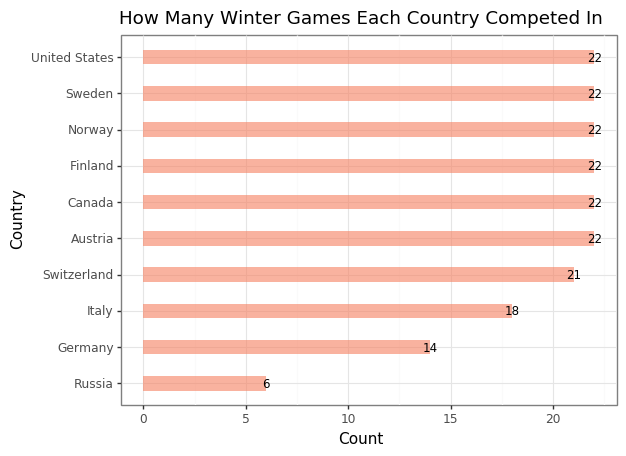

<ggplot: (8764164966369)>

In [17]:
(ggplot(n_of_games,
      aes(x = "reorder(Country, Count)", y = "Count")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 geom_text(aes(label="Count"), color="black", size=8.5)+
 labs(x = "Country", title = "How Many Winter Games Each Country Competed In") + 
 coord_flip() + theme_bw())

In [18]:
howmany = df6.groupby(["Country","Medal"]).size()
howmany = howmany.reset_index()
howmany = howmany.rename(columns = {0:"Count"})
howmany

Country   Medal  Count
0         Austria  Bronze     81
1         Austria    Gold     59
2         Austria  Silver     78
3          Canada  Bronze     52
4          Canada    Gold     62
5          Canada  Silver     56
6         Finland  Bronze     57
7         Finland    Gold     42
8         Finland  Silver     62
9         Germany  Bronze     58
10        Germany    Gold     86
11        Germany  Silver     84
12          Italy  Bronze     43
13          Italy    Gold     37
14          Italy  Silver     34
15         Norway  Bronze    100
16         Norway    Gold    111
17         Norway  Silver    108
18         Russia  Bronze     35
19         Russia    Gold     49
20         Russia  Silver     40
21         Sweden  Bronze     54
22         Sweden    Gold     50
23         Sweden  Silver     40
24    Switzerland  Bronze     47
25    Switzerland    Gold     50
26    Switzerland  Silver     40
27  United States  Bronze     84
28  United States    Gold     96
29  United States  Silver     99

In [19]:
cat_order = ['Gold','Silver','Bronze']
howmany['Medal'] = pd.Categorical(howmany['Medal'], categories=cat_order, ordered=True)

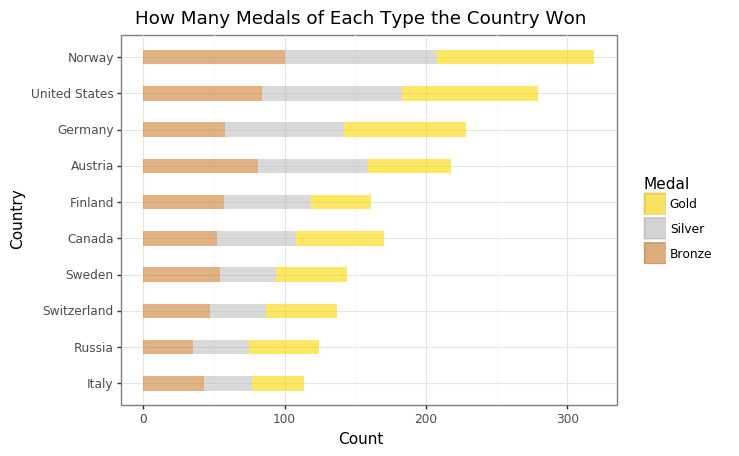

<ggplot: (8764164912125)>

In [20]:
(ggplot(howmany, aes(x = "reorder(Country, Count)", y = "Count", fill = "Medal")) + 
 geom_bar(stat="identity", alpha=.6, width=.4) + 
scale_fill_manual(values = ["#FFD700", "#C0C0C0", "#CD7F32"]) + 
 labs(x = "Country", title = "How Many Medals of Each Type the Country Won") +
 coord_flip() + theme_bw())

<div class="alert-warning">
I'm choosing Canada to compare with the States.
</div>

In [21]:
df6['Country'] = df6['Country'].str.replace('United States', 'United_States')

In [22]:
df7 = df6[df6["Country"].isin(["United_States","Canada"])]

In [23]:
df7['CountrySex'] = df7['Country'] + df7['Sex']

In [24]:
df8_1 = df7.groupby(["CountrySex","Year"]).size().reset_index()
df8_1 = df8_1.rename(columns = {0:"Count"})
df8_1['Cumulative'] = df8_1.groupby("CountrySex")['Count'].cumsum()
df8_1

CountrySex  Year  Count  Cumulative
0          CanadaF  1948      2           2
1          CanadaF  1956      2           4
2          CanadaF  1960      2           6
3          CanadaF  1964      2           8
4          CanadaF  1968      2          10
..             ...   ...    ...         ...
74  United_StatesM  1998      5          81
75  United_StatesM  2002     23         104
76  United_StatesM  2006     16         120
77  United_StatesM  2010     25         145
78  United_StatesM  2014     15         160

[79 rows x 4 columns]

<div class="alert-warning">
    For the first overtime comparison graph I did 4 different columns consisting each sex in each countries: Cumulative Medal Count of female athletes in Canada, males in Canada, females in the States and males in the States.
    </div>

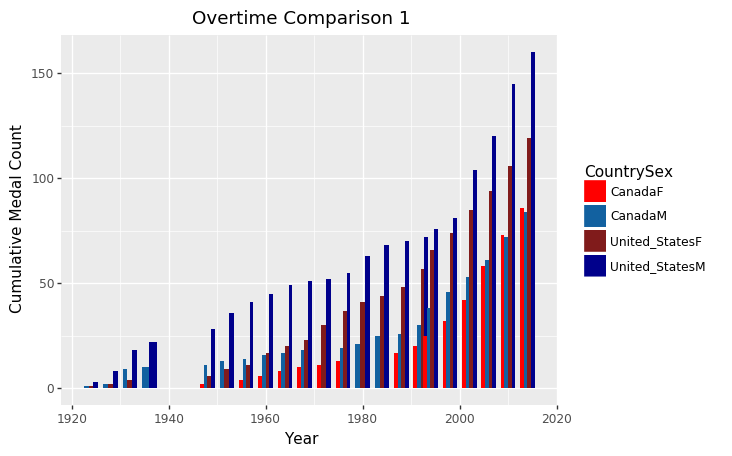

<ggplot: (8764165138005)>

In [25]:
(ggplot(df8_1, aes(x = "Year", y = "Cumulative", fill = "CountrySex")) + 
 labs(y = "Cumulative Medal Count", title = "Overtime Comparison 1") +
 scale_fill_manual(values = ["#ff0000", "#1261A0", "#801B1B","#00008b"]) + 
   geom_bar(stat = "identity", width= 3, position = "dodge"))

In [26]:
df9 = df6.groupby(["Country","Sex","Medal"]).size().reset_index()
df9 = df9.rename(columns = {0:"Count"})
df10 = df9[df9["Country"].isin(["United_States","Canada"])]
df10.reset_index(inplace = True)
df10.drop(columns = "index",inplace=True)

In [27]:
df9.head()

Country Sex   Medal  Count
0  Austria   F  Bronze     24
1  Austria   F    Gold     20
2  Austria   F  Silver     30
3  Austria   M  Bronze     57
4  Austria   M    Gold     39

In [28]:
df10 = df7.groupby(["Country","Year","Sex"]).size().reset_index()
df10 = df10.rename(columns = {0:"Count"})
df10['Cumulative'] = df10.groupby(["Country","Sex"])['Count'].cumsum()
df10.head()

Country  Year Sex  Count  Cumulative
0  Canada  1924   M      1           1
1  Canada  1928   M      1           2
2  Canada  1932   M      7           9
3  Canada  1936   M      1          10
4  Canada  1948   F      2           2

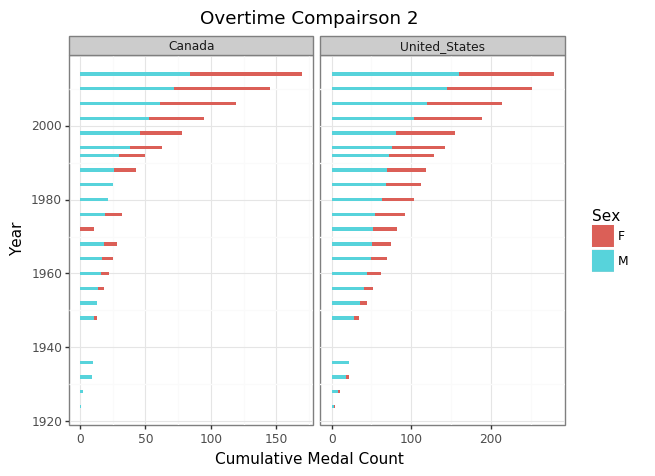

<ggplot: (8764165214305)>

In [29]:
(ggplot(df10, aes(x = "Year", y = "Cumulative", fill = "Sex")) + 
 geom_col()+ 
 facet_wrap("Country", scales = "free_x") + 
 coord_flip() + 
 labs(y = "Cumulative Medal Count", title = "Overtime Compairson 2") + 
 theme_bw())

<div class="alert-warning">
I created two graphs of cumulative medal count compairson between United States and Canada(overtime compairson 1&2), I would say I prefer the second plot because it's more straight forward in the sense that I used a shared x axis and the readers can tell how many medals each gender got cumulatively overtime between Canada and United States.
</div>

# 2. Medal Counts adjusted by Population, GDP

<div class="alert-warning">
I'm considering adding up the number of medals of different types since a bronze medal is just as "successful" as a gold medal in my opinion. Then I did 3 graphs of top 20 countries with the most medal count unadjusted, medal count adjusted by GDP per capita and medal count adjusted by population.
    </div>

In [30]:
df13 = df5.groupby("Country").size().sort_values(ascending=False).reset_index()
df13 = df13.rename(columns = {0:"Count"})

In [31]:
df14 = pd.merge(df13, df2, on="Country")
df14["Count_pop"] = df14["Count"]/(df14["Population"])
df14["Count_GDP"] = df14["Count"]/(df14["GDP per Capita"])
df14.head()

Country  Count  NOC   Population  GDP per Capita     Count_pop  \
0         Norway    319  NOR    5195921.0    74400.369777  6.139431e-05   
1  United States    279  USA  321418820.0    56115.718426  8.680263e-07   
2        Germany    228  GER   81413145.0    41313.313995  2.800531e-06   
3        Austria    218  AUT    8611088.0    43774.985174  2.531620e-05   
4         Canada    170  CAN   35851774.0    43248.529909  4.741746e-06   

   Count_GDP  
0   0.004288  
1   0.004972  
2   0.005519  
3   0.004980  
4   0.003931

In [32]:
df14_1 = df14.sort_values("Count", ascending= False)[:20]

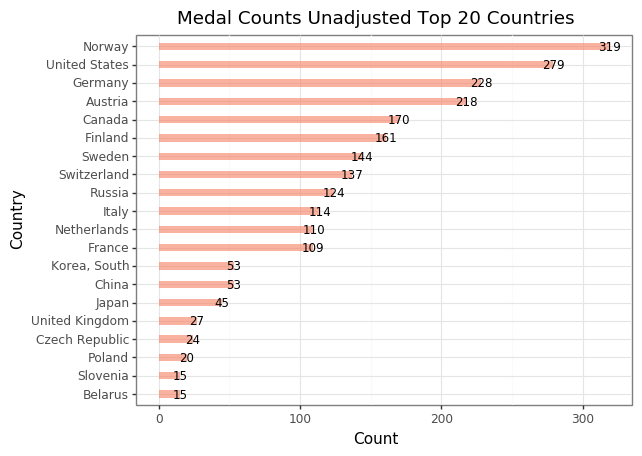

<ggplot: (8764165347253)>

In [33]:
(ggplot(df14_1, aes(x = "reorder(Country, Count)", y = "Count")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 geom_text(aes(label="Count"), color="black", size=8.5)+ 
 labs(x = "Country", title = "Medal Counts Unadjusted Top 20 Countries") + 
 geom_smooth() + 
 coord_flip() + theme_bw())

In [34]:
df14_2 = df14.sort_values("Count_GDP", ascending= False)[:20]

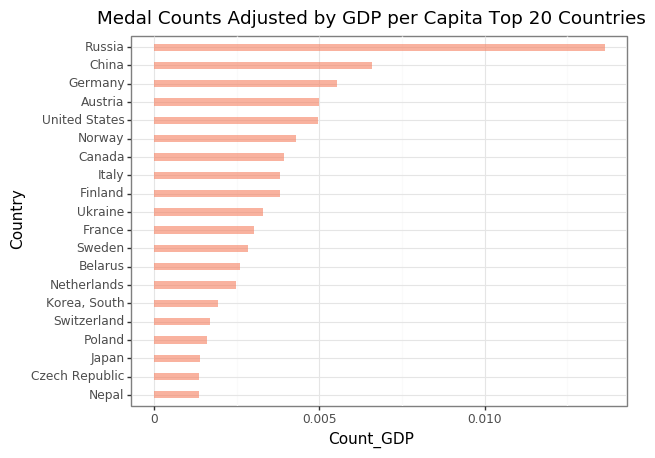

<ggplot: (8764165861429)>

In [35]:
(ggplot(df14_2, aes(x = "reorder(Country, Count_GDP)", y = "Count_GDP")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 labs(x = "Country", title = "Medal Counts Adjusted by GDP per Capita Top 20 Countries") + 
 geom_smooth() + 
 coord_flip() + theme_bw())

In [36]:
df14_3 = df14.sort_values("Count_pop", ascending= False)[:20]

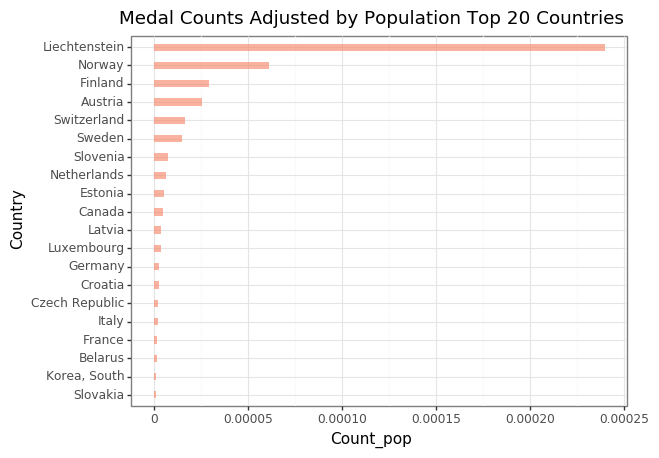

<ggplot: (8764166359429)>

In [37]:
(ggplot(df14_3, aes(x = "reorder(Country, Count_pop)", y = "Count_pop")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 labs(x = "Country", title = "Medal Counts Adjusted by Population Top 20 Countries") + 
 geom_smooth() + 
 coord_flip() + theme_bw())

In [38]:
# Ranking countries by Unadjusted Count(CountRank), Count adjusted by GDP per capita(GDPRank) and Count adjusted by population (PopRank)
df14['CountRank'] = df14['Count'].rank(method='dense', ascending=False)
df14['GDPRank'] = df14['Count_GDP'].rank(method='dense', ascending=False)
df14['PopRank'] = df14['Count_pop'].rank(method='dense', ascending=False)
df14.head()

Country  Count  NOC   Population  GDP per Capita     Count_pop  \
0         Norway    319  NOR    5195921.0    74400.369777  6.139431e-05   
1  United States    279  USA  321418820.0    56115.718426  8.680263e-07   
2        Germany    228  GER   81413145.0    41313.313995  2.800531e-06   
3        Austria    218  AUT    8611088.0    43774.985174  2.531620e-05   
4         Canada    170  CAN   35851774.0    43248.529909  4.741746e-06   

   Count_GDP  CountRank  GDPRank  PopRank  
0   0.004288        1.0      6.0      2.0  
1   0.004972        2.0      5.0     21.0  
2   0.005519        3.0      3.0     13.0  
3   0.004980        4.0      4.0      4.0  
4   0.003931        5.0      7.0     10.0

In [39]:
df14_4 = df14[:20]

In [40]:
# Ordering dataframe by Unadjusted Medal Count
ordered_df = df14_4.sort_values(by='Count')
my_range=range(1,len(df14_4.index)+1)

<div class="alert-warning">    
I chose the top 20 countries in total medal rank unadjusted to plot, as the dumbbell plot shows, most of the top 20 countries with total unadjusted medal counts have lower rank in rank adjusted by GDP per capita & rank adjusted by population. 
        </div>

Text(0.5, 0, 'Rank')

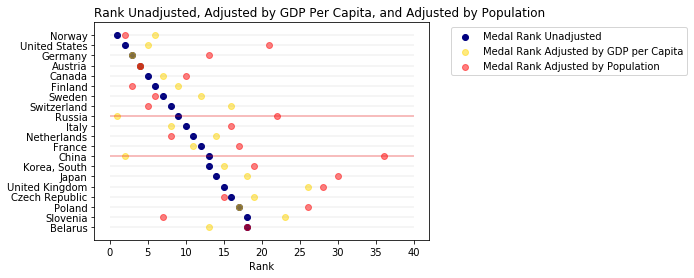

In [41]:
plt.hlines(y=my_range, xmin=0,xmax=40, color='grey', alpha=0.1)
plt.hlines(y=(8,12), xmin=0,xmax=40, color='red', alpha=0.3)
plt.scatter(ordered_df['CountRank'], my_range, color='navy', alpha=1, label='Medal Rank Unadjusted')
plt.scatter(ordered_df['GDPRank'], my_range, color='gold', alpha=0.5 , label='Medal Rank Adjusted by GDP per Capita')
plt.scatter(ordered_df['PopRank'], my_range, color='red', alpha=0.5, label='Medal Rank Adjusted by Population')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.yticks(my_range, ordered_df['Country'])
plt.title("Rank Unadjusted, Adjusted by GDP Per Capita, and Adjusted by Population", loc='left')
plt.xlabel('Rank')

<div class="alert-warning">    
I then highlighted two countries (China & Russia) with higher population and lower GDP per Capita, and as I thought their ranks in medal rank adjusted by GDP per Capita is higher than their counterparts(other top 20 countries) and their ranks in medal rank adjusted by population is lower than their counterparts as the graph shows.
     </div>

# 3. Host Country Advantage



In [42]:
df15 = pd.read_html("https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities")[1]
host_list = df15[['City.1','Country','Year']]
host_list = host_list.rename(columns = {"City.1":"City"})

In [43]:
df16 = pd.merge(df5, host_list, on=["City","Year"])
df16.head()

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0    3610  An Yulong   M  19.0   173.0    70.0  China  CHN  1998 Winter  1998   
1   20240    Chen Lu   F  21.0   162.0    52.0  China  CHN  1998 Winter  1998   
2   69393  Li Jiajun   M  22.0   174.0    76.0  China  CHN  1998 Winter  1998   
3  132077  Xu Nannan   F  19.0   158.0    53.0  China  CHN  1998 Winter  1998   
4  132562  Yang Yang   F  20.0   165.0    60.0  China  CHN  1998 Winter  1998   

   ...    City                      Sport  \
0  ...  Nagano  Short Track Speed Skating   
1  ...  Nagano             Figure Skating   
2  ...  Nagano  Short Track Speed Skating   
3  ...  Nagano           Freestyle Skiing   
4  ...  Nagano  Short Track Speed Skating   

                                          Event   Medal Country_x  \
0    Short Track Speed Skating Men's 500 metres  Silver     China   
1                Figure Skating Women's Singles  Bronze     China   
2  Short Track Speed Skating Men's 1,000 metres  Silver     China   
3              Freestyle Skiing Women's Aerials  Silver     China   
4  Short Track Speed Skating Women's 500 metres  Silver     China   

     Population  GDP per Capita  region notes Country_y  
0  1.371220e+09      8027.68381   China   NaN     Japan  
1  1.371220e+09      8027.68381   China   NaN     Japan  
2  1.371220e+09      8027.68381   China   NaN     Japan  
3  1.371220e+09      8027.68381   China   NaN     Japan  
4  1.371220e+09      8027.68381   China   NaN     Japan  

[5 rows x 21 columns]

In [44]:
df17 = df16[df16["Country_x"] == df16["Country_y"]]

In [45]:
hosted = df17.groupby(["Country_x","Year"]).size()
hosted = hosted.reset_index()
hosted = hosted.rename(columns = {0:"Count"})
hosted.head()

Country_x  Year  Count
0   Austria  1964     12
1    Canada  1988      5
2    Canada  2010     26
3    France  1924      3
4    France  1968      9

In [46]:
hosted1 = df5[df5['Country'].isin(hosted["Country_x"])]
hosted2 = hosted1.groupby(["Country","Year"]).size().reset_index()
hosted2 = hosted2.rename(columns = {0:"Count"})
hosted2.head()

Country  Year  Count
0  Austria  1924      3
1  Austria  1928      4
2  Austria  1932      2
3  Austria  1936      4
4  Austria  1948      8

<div class="alert-warning">
I plotted line graph of medal count with all the countries that have hosted winter olympics overtime. Then I added black dots for the year each country hosted the winter olympics.
</div>

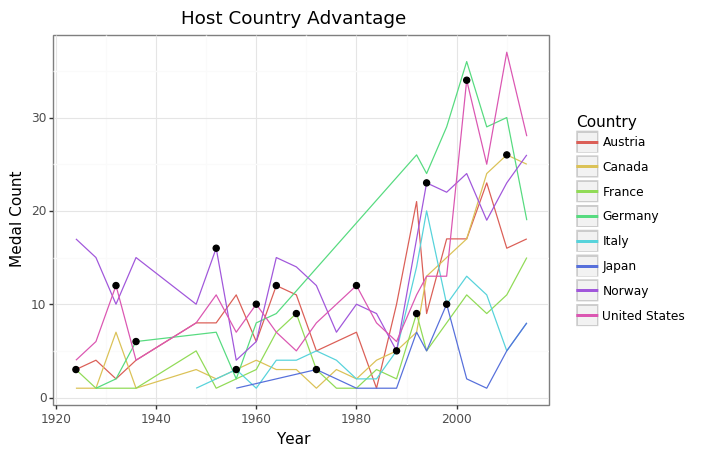

<ggplot: (8764169881037)>

In [47]:
(ggplot(hosted2, aes(x = "Year", y = "Count", color = "Country")) + 
 geom_line() + 
 labs(y = "Medal Count", title = "Host Country Advantage") +
 theme_bw()) + geom_point(data=hosted, color = "black", size = 2)

<div class="alert-warning">
An interesting trend here is that readers can clearly tell many of the dots (medal count of the country for the year countries hosted olympics) were the peak medal count of the decade with immediately declining medal counts the following years. So I would say host country advantage exist.
</div>

## 4. Most successful athletes

<div class="alert-warning">
    I calculated the total medal(gold, silver, and bronze) counts of each athlete and selected the top 10
    athletes.
        </div>

In [48]:
successful = df5.groupby(["Name"]).size().sort_values(ascending=False).reset_index()
successful = successful.rename(columns = {0:"Count"})
successful = successful[:10]

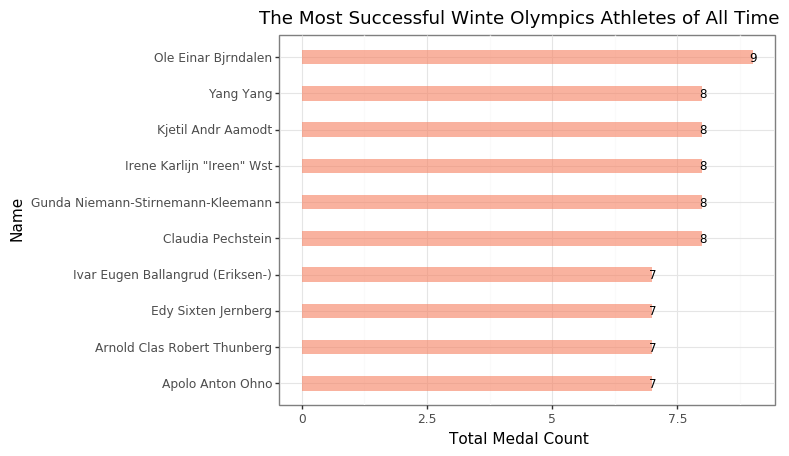

<ggplot: (8764170037961)>

In [49]:
(ggplot(successful,
      aes(x = "reorder(Name, Count)", y = "Count")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 geom_text(aes(label="Count"), color="black", size=8.5)+
 labs(x = "Name", y = "Total Medal Count", title = "The Most Successful Winte Olympics Athletes of All Time") + 
 coord_flip() + theme_bw())

In [50]:
info = pd.merge(successful, df5, on="Name")
info = info.drop_duplicates(subset=['Name']).reset_index().drop(columns = "index")

In [51]:
info['BMI'] = info['Weight'] / ((info['Height']/100) ** 2)

In [52]:
info['BMI'] = round(info['BMI'], 2)

<div class="alert-warning">
I then plotted the Body Mass Index of the most successful winter olympics athletes of all time using BMI = weight in kg/(height in m^2) and rounded them up to 2 decimal places. The row for Ivar Eugen Ballangrud is missing since the weight of him is NaN in the dataset and I couldn't find it anywhere on the Internet either.
        </div>

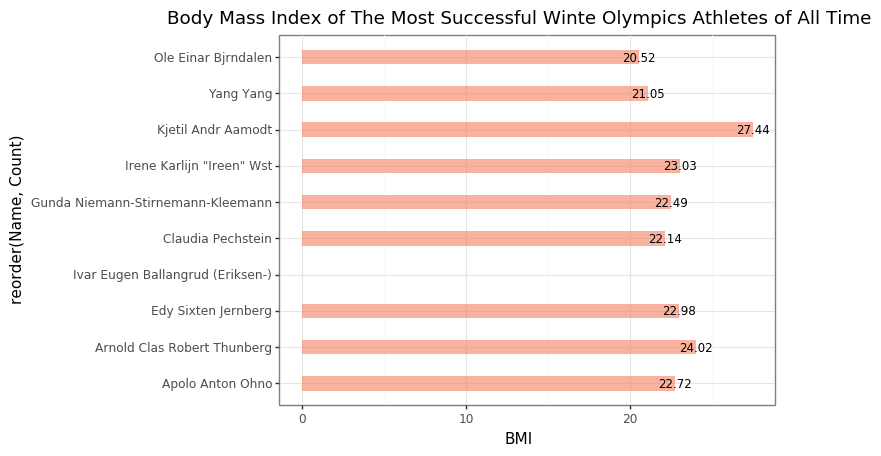

<ggplot: (8764171020825)>

In [53]:
(ggplot(info,
      aes(x = "reorder(Name, Count)", y = "BMI")) + 
 geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) + 
 geom_text(aes(label="BMI"), color="black", size=8.5)+
 labs(title = "Body Mass Index of The Most Successful Winte Olympics Athletes of All Time") + 
 coord_flip() + theme_bw())

<div class="alert-warning">
    As the graph shows the top 10 successful winter olympics athletes' BMIs are all in the healthy range of 18 to 25 which is not surprising except only one athlete (Kjetil Andr Aamodt) having a BMI over 25.0 which is considered "overweight" by BMI standard. It shows that the third most successful winter olympic athlete can be considered overweight by society standard which is obviously not an indication of his health and athletic ability.
        </div>
    
    

# 5. Make two plots interactive

In [54]:
import plotly.express as px
import plotly.graph_objs as go

In [55]:
df14.head()

Country  Count  NOC   Population  GDP per Capita     Count_pop  \
0         Norway    319  NOR    5195921.0    74400.369777  6.139431e-05   
1  United States    279  USA  321418820.0    56115.718426  8.680263e-07   
2        Germany    228  GER   81413145.0    41313.313995  2.800531e-06   
3        Austria    218  AUT    8611088.0    43774.985174  2.531620e-05   
4         Canada    170  CAN   35851774.0    43248.529909  4.741746e-06   

   Count_GDP  CountRank  GDPRank  PopRank  
0   0.004288        1.0      6.0      2.0  
1   0.004972        2.0      5.0     21.0  
2   0.005519        3.0      3.0     13.0  
3   0.004980        4.0      4.0      4.0  
4   0.003931        5.0      7.0     10.0

<div class="alert-warning">
    I plotted an interactive graph in question 2 for all the countries with an winter olympic medal and their GDP per Capita, Total Medal Count, and population. It's clearly more helpful and understandable for a reader since you can select and zoom into the contries and clearly see its population size which was not doable in a static image.
        </div>

In [56]:
fig = px.scatter(df14, x = "GDP per Capita", y = "Count", size = "Population",
          color = "Country",hover_name = "Country",log_x = True, size_max = 100).update_layout(
    yaxis_title="Total Medal Count"
)
fig.show()

<div class="alert-warning">
    For the second interactive graph, I used the data in question 4, but instead of the top 10 athletes I filtered to top 500 athletes and sorted the color by the type of sport they play.
        </div>

In [57]:
athletes = df5.groupby("Name").size().reset_index()
athletes = athletes.rename(columns = {0:"Count"})
athletes = athletes.sort_values("Count", ascending = False)[:500]

In [58]:
info2 = pd.merge(athletes, df5, on="Name")
info2 = info2.drop_duplicates(subset=['Name']).reset_index().drop(columns = "index")
info2['BMI'] = info2['Weight'] / ((info2['Height']/100) ** 2)
info2['BMI'] = round(info2['BMI'], 2)

In [59]:
fig2 = px.scatter(info2, x = "Age", y = "BMI",
          color = "Sport", hover_name = "Name",log_x = True).update_layout(
    yaxis_title="BMI", title = "BMI of Top 200 Olympic Winter Athletes"
)
fig2.show()

<div class="alert-warning">
This interactive graph is particularly helpful since it can filter the type of sport the top 100 athletes play and see the BMI differences more clearly. From this interactive graph readers can tell there are certain sports that have medal winning athletes with higher BMIs such as Bobsleigh, with most athletes' BMIs range between 24-32, and certain sports have lower bmi athletes like Ski Jumping have athletes with BMI range between 17-21.
        </div>

# 6. Data Table


<div class="alert-warning">
    I did the datatable of df5 which is the dataframe with winning medals and added column search features.
        </div>

In [60]:
df5.to_csv("df5.csv")

In [61]:
%reload_ext rpy2.ipython

In [65]:
%%R
library(DT)
rdf <- read.csv(file = 'df5.csv')
head(rdf)
datatable(rdf, filter = 'top', options = list(
  pageLength = 5, autoWidth = TRUE))